<a href="https://colab.research.google.com/github/RafsanJany-44/ARC/blob/master/DS_Healthcare_experiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
data= pd.read_excel('/content/drive/MyDrive/Tanjila_mam/DS-Healthcare_version_2.xlsx')
result = {}
target = 'Type'

In [4]:
data[target].value_counts()

ischemic      581219
healthy       267360
arrhythmic     40238
Name: Type, dtype: int64

In [5]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

data[target]=encoder.fit_transform(data[target])

In [9]:
X= data.loc[:,data.columns != target]
y = data[target]

In [10]:
def fun_split(X,Y,test_size,feature):

    f=Y.value_counts()
    rows=X.shape[0]
    talika=[]
    count=0
    for i in f:
        talika.append(i)
    train_size=1-test_size
    start=0

    switch=False

    for i in talika :

        train=start+int(i*train_size)
        f= X[feature][train]
        count1=0
        count2=0
        index1=train
        index2=train+1
        end=start+i-1

        while X[feature][index1]==f:
            if index1<start:
                break
            index1-=1
            count1+=1


        while X[feature][index2]==f:
            if index2>end:
                break
            index2+=1
            count2+=1

        if count1>=count2:
            train+=count2
        else:
            train-=count1


        if switch == False:
            X_train= X[start:train+1]
            X_test= X[train+1:end]
            Y_train = Y[start:train+1]
            Y_test = Y[train+1:end]
            switch=True

        else:
            X_train=pd.concat([X_train, X[start:train+1]], ignore_index=True)
            X_test=pd.concat([X_test, X[train+1:end+1]], ignore_index=True)
            Y_train=pd.concat([Y_train, Y[start:train+1]], ignore_index=True)
            Y_test=pd.concat([Y_test, Y[train+1:end+1]], ignore_index=True)

        start=start+i

    print('Train Percentage:',X_train.shape[0]/rows)

    return X_train,X_test,Y_train,Y_test

In [11]:
 X_train, X_test, y_train, y_test = fun_split(X,y, test_size=0.2, feature= 'Subject')

Train Percentage: 0.8002839729663137


In [ ]:
"""#testing if there is any mixing with training subject and testing subject
from tqdm.notebook import tqdm
train = list(X_train["Subject"])
test = list(X_test["Subject"])

dup = []

for i in tqdm(test):
  if i in train:
    dup.append(i)
print(dup)"""

'#testing if there is any mixing with training subject and testing subject\nfrom tqdm.notebook import tqdm\ntrain = list(X_train["Subject"])\ntest = list(X_test["Subject"])\n\ndup = []\n\nfor i in tqdm(test):\n  if i in train:\n    dup.append(i)\nprint(dup)'

In [12]:
X_train= X_train.loc[:,X_train.columns != 'Subject']
X_train= X_train.loc[:,X_train.columns != 'Time']
X_train= X_train.loc[:,X_train.columns != 'Cycle']

X_test= X_test.loc[:,X_test.columns != 'Subject']
X_test= X_test.loc[:,X_test.columns != 'Time']
X_test= X_test.loc[:,X_test.columns != 'Cycle']

#GradientBoost

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RepeatedStratifiedKFold

gradBoost_default = GradientBoostingClassifier(random_state=0)
gradBoost_default.fit(X_train, y_train)
y_pred = gradBoost_default.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(gradBoost_default,2,'GradientBoostingClassifier')]=accuracy_score(y_test, y_pred)

[[  3244    605   3710]
 [  4212  30356  18567]
 [  1366     15 115435]]
              precision    recall  f1-score   support

           0       0.37      0.43      0.40      7559
           1       0.98      0.57      0.72     53135
           2       0.84      0.99      0.91    116816

    accuracy                           0.84    177510
   macro avg       0.73      0.66      0.67    177510
weighted avg       0.86      0.84      0.83    177510

Accurecy:  0.8395865021688919


  0%|          | 0/5 [00:00<?, ?it/s]

58/62 round completed......................... Accurecy: 0.8522449439468199
59/62 round completed......................... Accurecy: 0.8544025688693595
60/62 round completed......................... Accurecy: 0.8530956002478733
61/62 round completed......................... Accurecy: 0.8526392879274407
62/62 round completed......................... Accurecy: 0.8526899892963776
The best n_estimators:
59


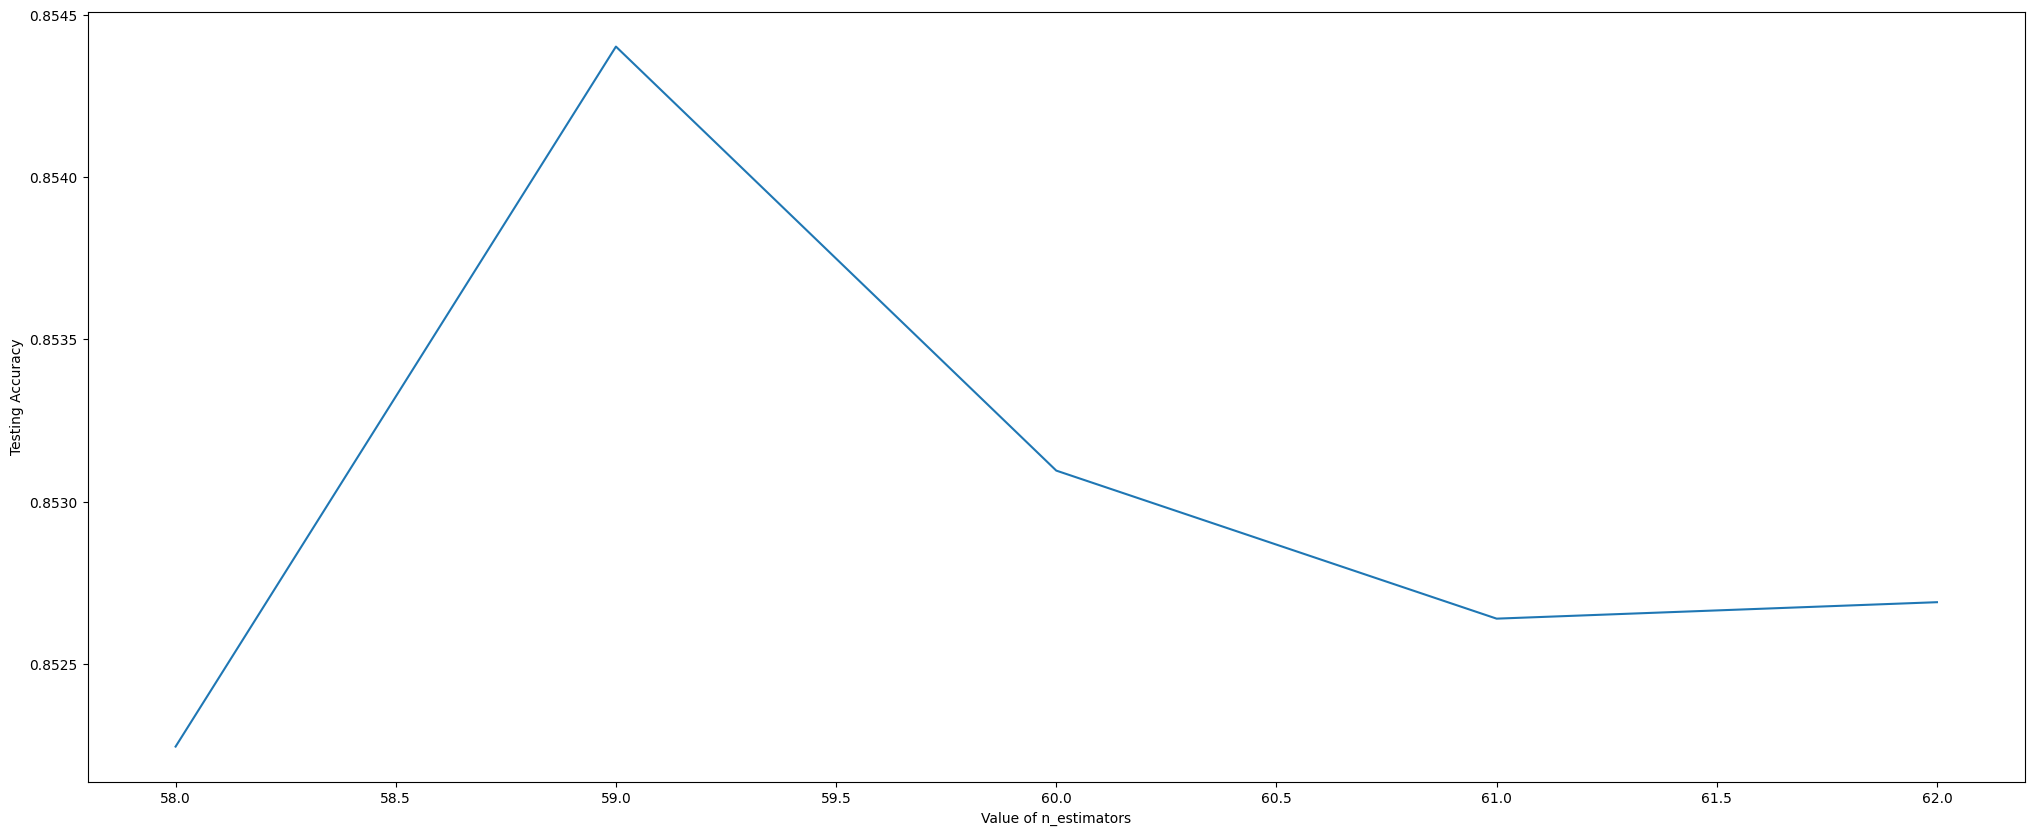

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
N=62
k_range = range (58,N+1)
scores={}
scores_list = []
for k in tqdm(k_range):
  classifier = GradientBoostingClassifier(n_estimators=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best n_estimators:")
best_estimator=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)

  0%|          | 0/4 [00:00<?, ?it/s]

1/4 round completed......................... Accurecy: 0.8913018984845924
2/4 round completed......................... Accurecy: 0.86329220888964
3/4 round completed......................... Accurecy: 0.8395865021688919
4/4 round completed......................... Accurecy: 0.8082417891949749
The best Depth:
1


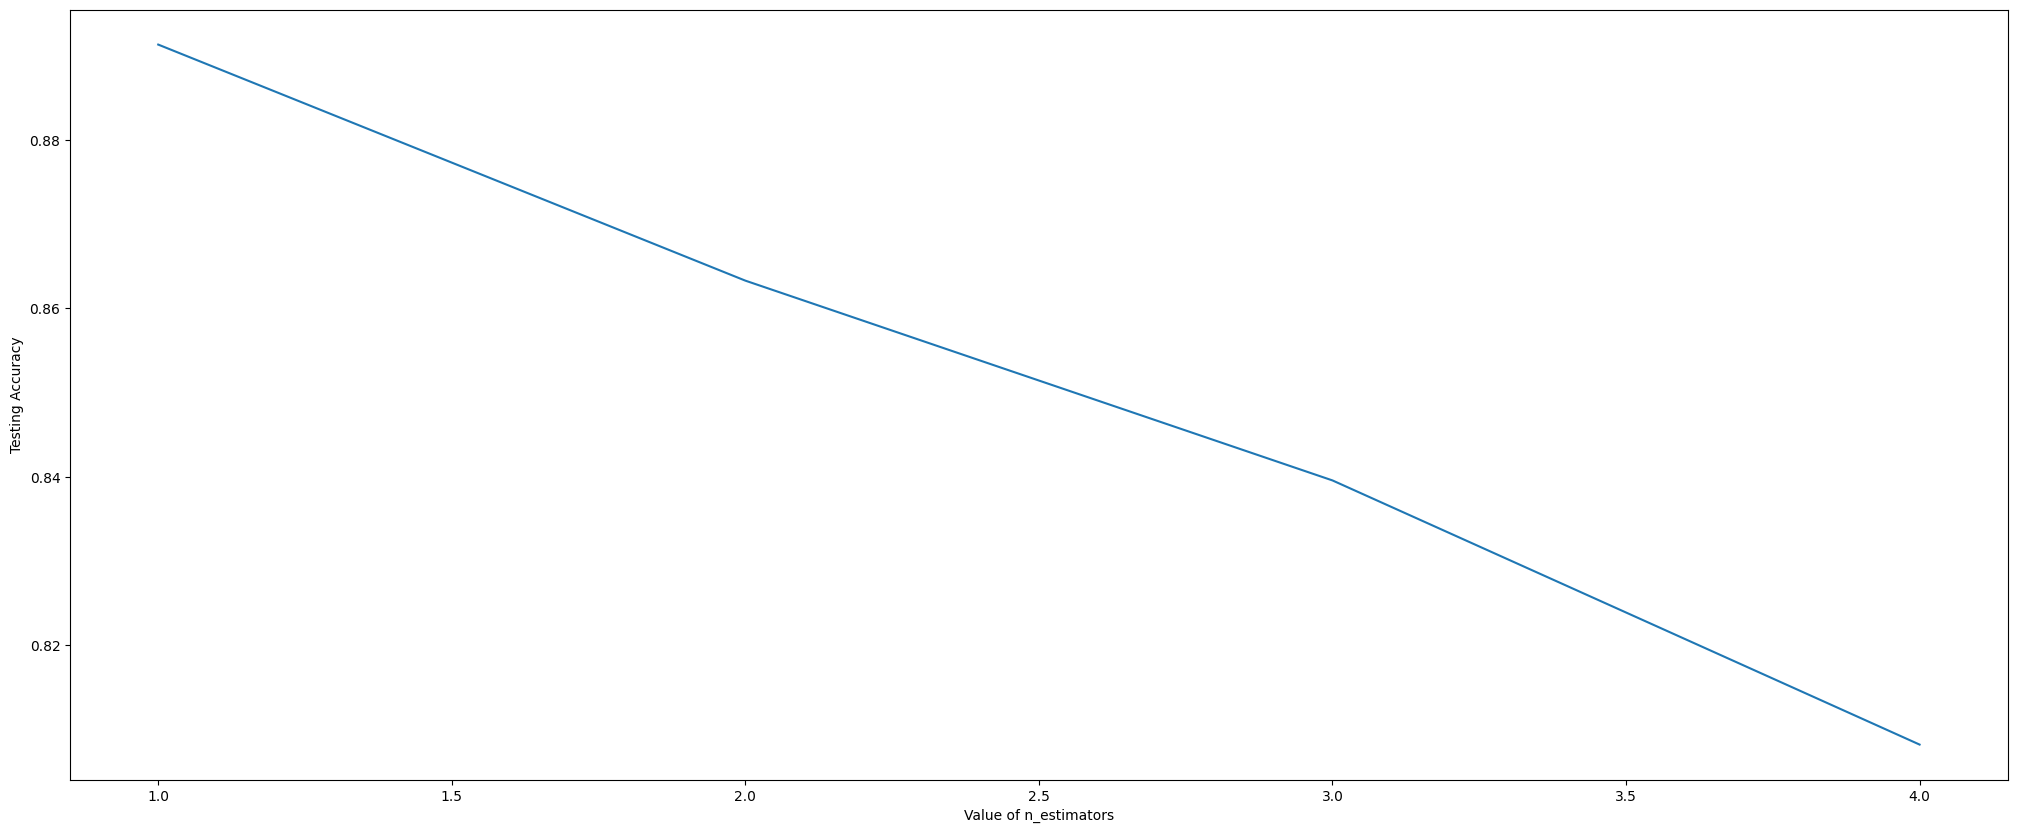

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
N=4
k_range = range (1,N+1)
scores={}
scores_list = []
for k in tqdm(k_range):
  classifier = GradientBoostingClassifier(max_depth=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best Depth:")
best_depth=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_depth)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gradBoost_estimator = GradientBoostingClassifier(n_estimators=best_estimator,random_state=0)
gradBoost_estimator.fit(X_train, y_train)
y_pred = gradBoost_estimator.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(gradBoost_estimator,2,'GradientBoostingClassifier')]=accuracy_score(y_test, y_pred)

[[  2260    704   4595]
 [  3511  34167  15457]
 [  1567     11 115238]]
              precision    recall  f1-score   support

           0       0.31      0.30      0.30      7559
           1       0.98      0.64      0.78     53135
           2       0.85      0.99      0.91    116816

    accuracy                           0.85    177510
   macro avg       0.71      0.64      0.66    177510
weighted avg       0.87      0.85      0.85    177510

Accurecy:  0.8544025688693595


In [ ]:

from sklearn.ensemble import GradientBoostingClassifier

gradBoost_depth = GradientBoostingClassifier(max_depth=best_depth,random_state=0)
gradBoost_depth.fit(X_train, y_train)
y_pred = gradBoost_depth.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(gradBoost_depth,2,'GradientBoostingClassifier')]=accuracy_score(y_test, y_pred)

[[   902    821   5836]
 [  1005  40958  11172]
 [   448     13 116355]]
              precision    recall  f1-score   support

           0       0.38      0.12      0.18      7559
           1       0.98      0.77      0.86     53135
           2       0.87      1.00      0.93    116816

    accuracy                           0.89    177510
   macro avg       0.75      0.63      0.66    177510
weighted avg       0.88      0.89      0.88    177510

Accurecy:  0.8913018984845924


In [ ]:

from sklearn.ensemble import GradientBoostingClassifier

gradBoost_all = GradientBoostingClassifier(n_estimators=best_estimator,max_depth=best_depth,random_state=0)
gradBoost_all.fit(X_train, y_train)
y_pred = gradBoost_all.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(gradBoost_all,2,'GradientBoostingClassifier')]=accuracy_score(y_test, y_pred)

[[   416    245   6898]
 [    38  24062  29035]
 [   166      0 116650]]
              precision    recall  f1-score   support

           0       0.67      0.06      0.10      7559
           1       0.99      0.45      0.62     53135
           2       0.76      1.00      0.87    116816

    accuracy                           0.80    177510
   macro avg       0.81      0.50      0.53    177510
weighted avg       0.83      0.80      0.76    177510

Accurecy:  0.7950425328150527


#RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_default = RandomForestClassifier(random_state=0)
rf_default.fit(X_train, y_train)
y_pred=rf_default.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(rf_default,3,'RandomForestClassifier')]=accuracy_score(y_test, y_pred)

[[  1653    278   5628]
 [ 14042  10672  28421]
 [   759      5 116052]]
              precision    recall  f1-score   support

           0       0.10      0.22      0.14      7559
           1       0.97      0.20      0.33     53135
           2       0.77      0.99      0.87    116816

    accuracy                           0.72    177510
   macro avg       0.62      0.47      0.45    177510
weighted avg       0.80      0.72      0.68    177510

Accurecy:  0.7232099600022533


  0%|          | 0/5 [00:00<?, ?it/s]

1/5 round completed......................... Accurecy: 0.7446003042082137
2/5 round completed......................... Accurecy: 0.7601937918990479
3/5 round completed......................... Accurecy: 0.7277899836628923
4/5 round completed......................... Accurecy: 0.7300828122359304
5/5 round completed......................... Accurecy: 0.731727789983663
The best n_estimators:
2


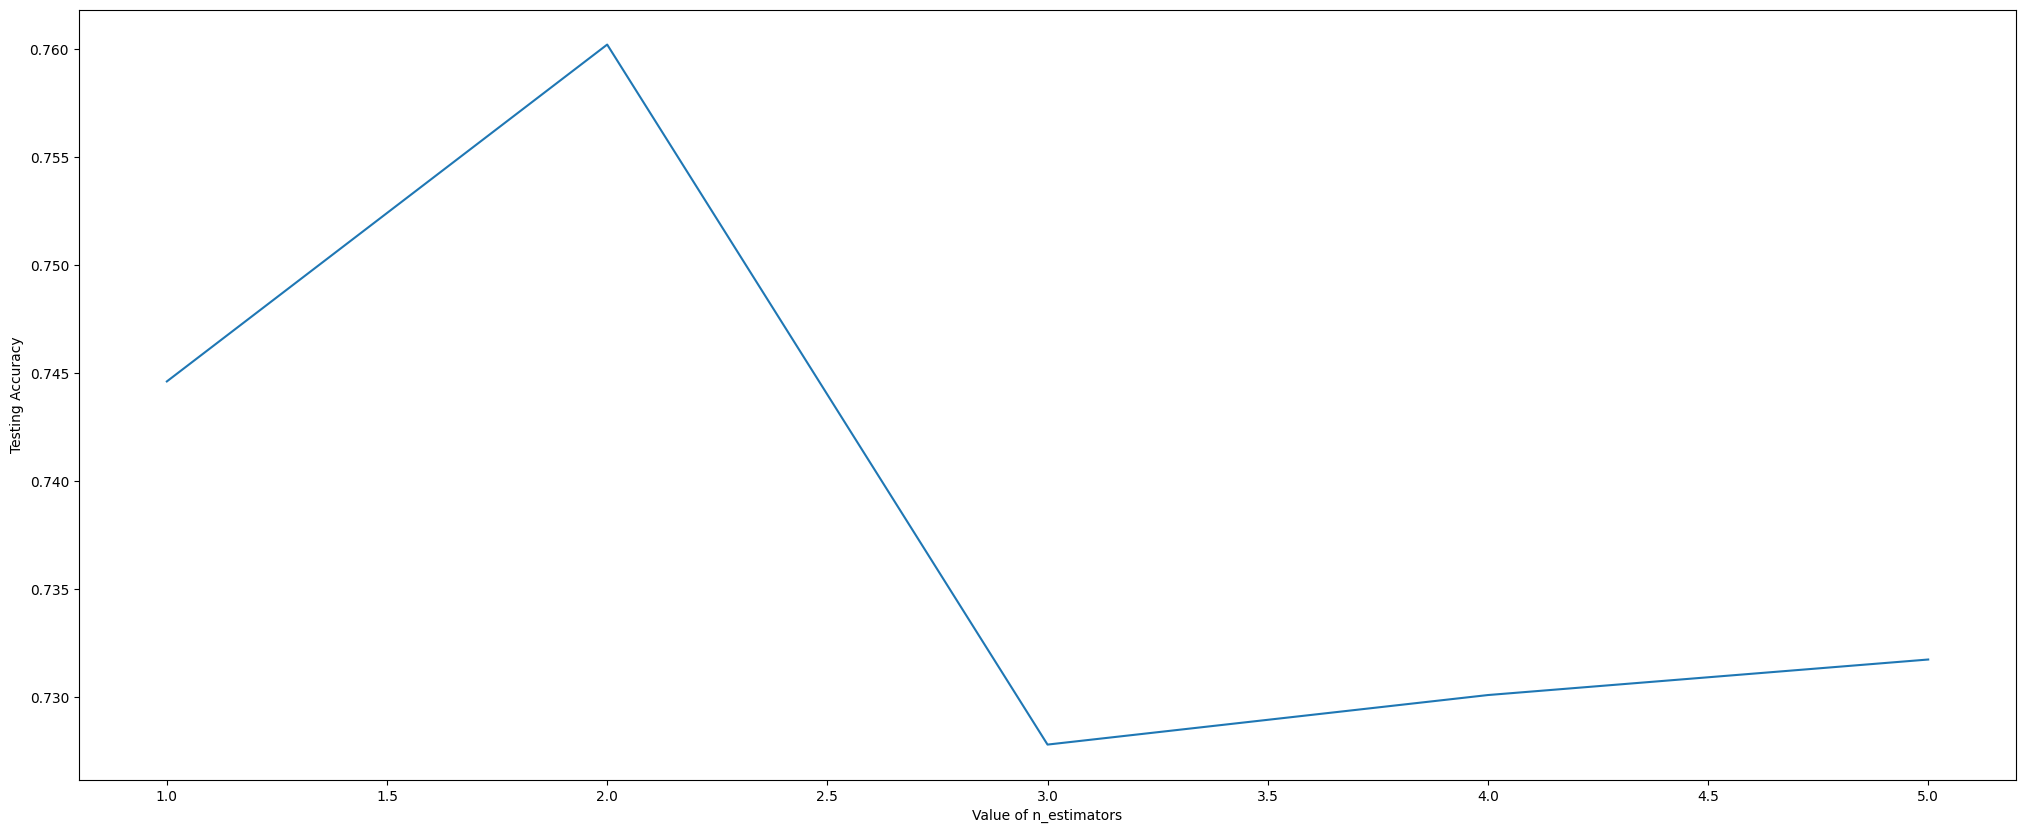

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
N=5
k_range = range (1,N+1)
scores={}
scores_list = []
for k in tqdm(k_range):
  classifier = RandomForestClassifier(n_estimators=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best n_estimators:")
best_estimator=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)

  0%|          | 0/7 [00:00<?, ?it/s]

7/13 round completed......................... Accurecy: 0.814770998816968
8/13 round completed......................... Accurecy: 0.8245563630218016
9/13 round completed......................... Accurecy: 0.8147935327587178
10/13 round completed......................... Accurecy: 0.8045743901752014
11/13 round completed......................... Accurecy: 0.7870824178919498
12/13 round completed......................... Accurecy: 0.7867387752802659
13/13 round completed......................... Accurecy: 0.7734212157061574
The best Depth:
8


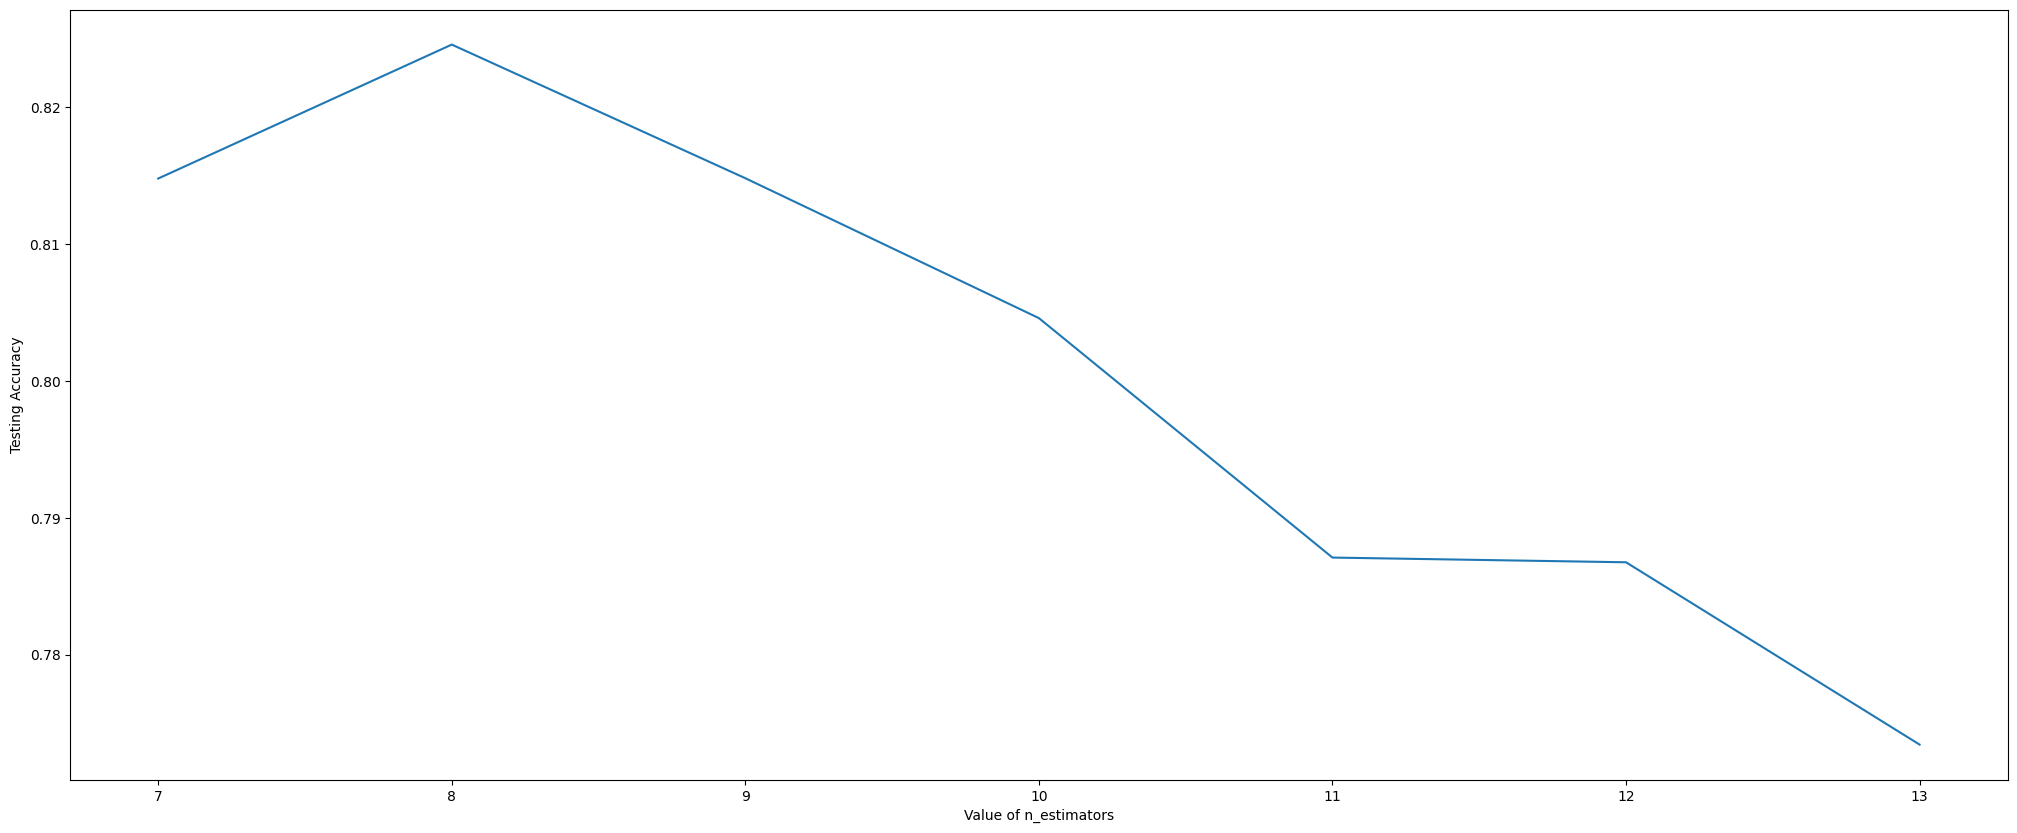

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
N=13
k_range = range (7,N+1)
scores={}
scores_list = []
for k in tqdm(k_range):
  classifier = RandomForestClassifier(max_depth=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best Depth:")
best_depth=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_depth)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_estimator = RandomForestClassifier(n_estimators=best_estimator,random_state=0)
rf_estimator.fit(X_train, y_train)
y_pred=rf_estimator.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(rf_estimator,3,'RandomForestClassifier')]=accuracy_score(y_test, y_pred)

[[  3853    958   2748]
 [ 19469  17530  16136]
 [  2839    418 113559]]
              precision    recall  f1-score   support

           0       0.15      0.51      0.23      7559
           1       0.93      0.33      0.49     53135
           2       0.86      0.97      0.91    116816

    accuracy                           0.76    177510
   macro avg       0.64      0.60      0.54    177510
weighted avg       0.85      0.76      0.76    177510

Accurecy:  0.7601937918990479


In [ ]:

from sklearn.ensemble import RandomForestClassifier
rf_depth = RandomForestClassifier(max_depth=best_depth,random_state=0)
rf_depth.fit(X_train, y_train)
y_pred=rf_depth.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(rf_depth,3,'RandomForestClassifier')]=accuracy_score(y_test, y_pred)

[[   459    831   6269]
 [  2213  29863  21059]
 [   757     14 116045]]
              precision    recall  f1-score   support

           0       0.13      0.06      0.08      7559
           1       0.97      0.56      0.71     53135
           2       0.81      0.99      0.89    116816

    accuracy                           0.82    177510
   macro avg       0.64      0.54      0.56    177510
weighted avg       0.83      0.82      0.80    177510

Accurecy:  0.8245563630218016


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_all = RandomForestClassifier(n_estimators=best_estimator,max_depth=best_depth,random_state=0)
rf_all.fit(X_train, y_train)
y_pred=rf_all.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(rf_all,3,'RandomForestClassifier')]=accuracy_score(y_test, y_pred)

[[   693    963   5903]
 [  5235  32101  15799]
 [  1016     57 115743]]
              precision    recall  f1-score   support

           0       0.10      0.09      0.10      7559
           1       0.97      0.60      0.74     53135
           2       0.84      0.99      0.91    116816

    accuracy                           0.84    177510
   macro avg       0.64      0.56      0.58    177510
weighted avg       0.85      0.84      0.83    177510

Accurecy:  0.8367810264210467


#XGBoost

In [ ]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import xgboost as xgb
xgb_deafult = xgb.XGBClassifier(random_state=0)
xgb_deafult.fit(X_train.values,y_train.values)
y_pred = xgb_deafult.predict(X_test.values)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(xgb_deafult,4,'xgboost')]=accuracy_score(y_test, y_pred)

[[  5975    117   1467]
 [  5598  21215  26322]
 [   309     13 116494]]
              precision    recall  f1-score   support

           0       0.50      0.79      0.61      7559
           1       0.99      0.40      0.57     53135
           2       0.81      1.00      0.89    116816

    accuracy                           0.81    177510
   macro avg       0.77      0.73      0.69    177510
weighted avg       0.85      0.81      0.78    177510

Accurecy:  0.8094417215931496


  0%|          | 0/5 [00:00<?, ?it/s]

1/5 round completed......................... Accurecy: 0.8318517266632866
2/5 round completed......................... Accurecy: 0.8577150583065742
3/5 round completed......................... Accurecy: 0.8775618275026759
4/5 round completed......................... Accurecy: 0.8341952566052617
5/5 round completed......................... Accurecy: 0.8339924511295138
The best n_estimators:
3


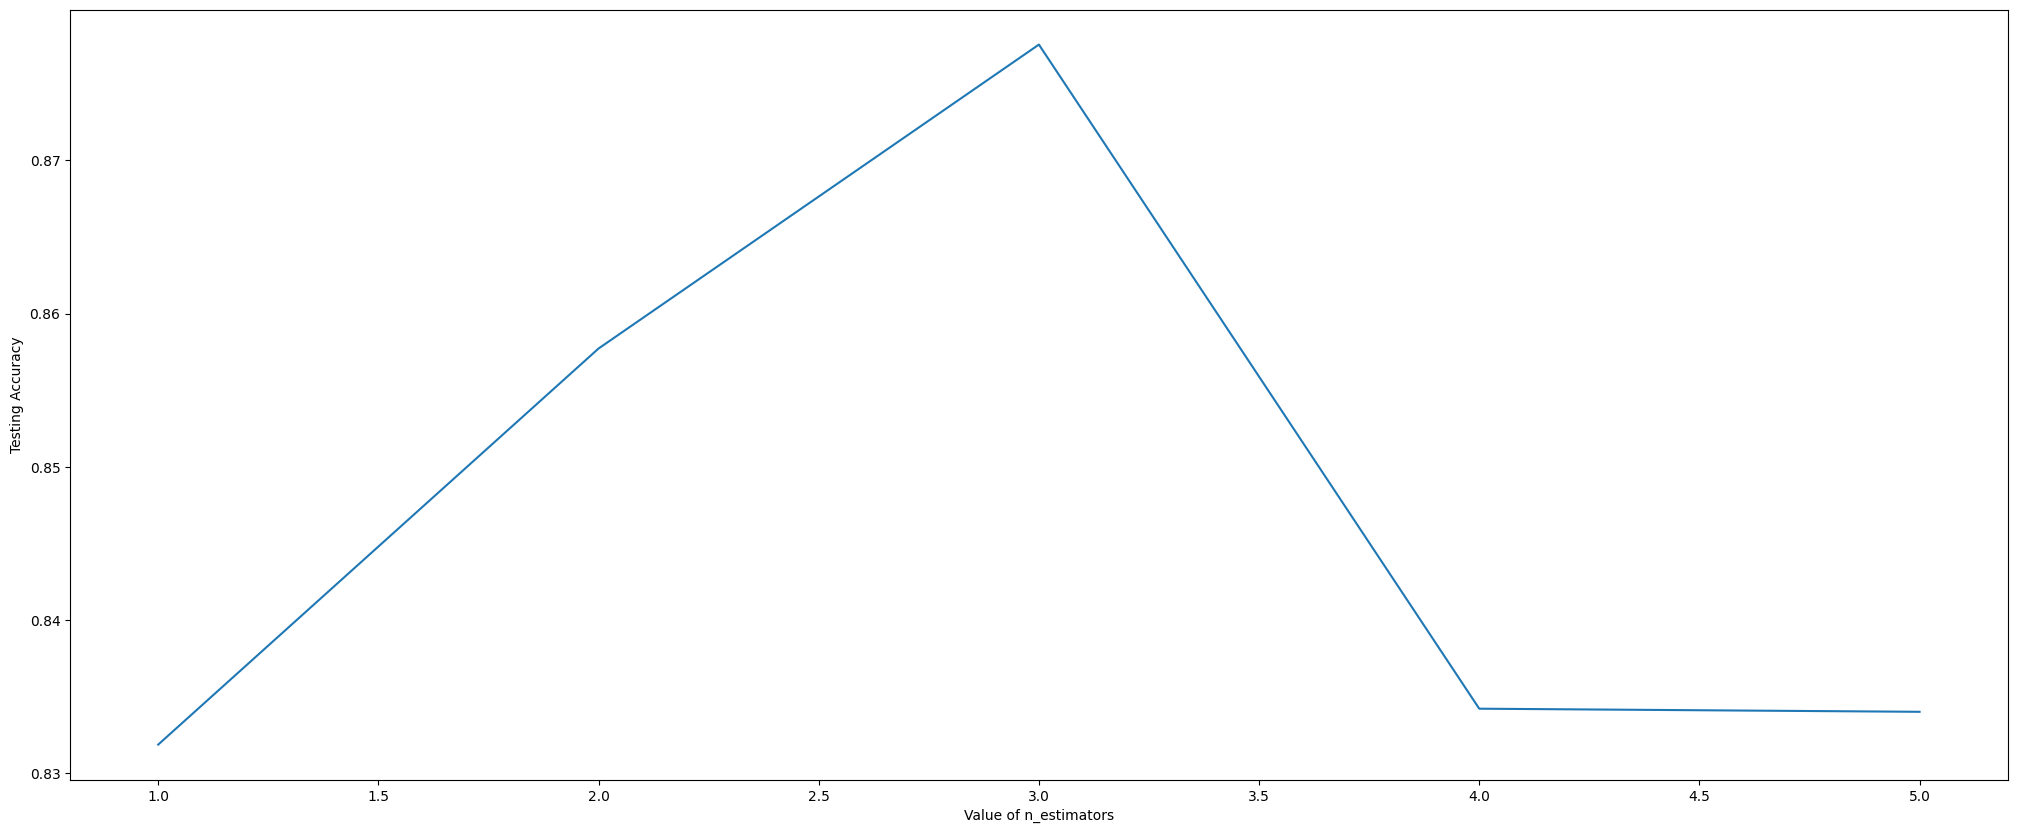

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
N=5
k_range = range (1,N+1)
scores={}
scores_list = []
for k in tqdm(k_range):
  xgb_classifier = xgb.XGBClassifier(n_estimators=k,random_state=0)
  xgb_classifier.fit(X_train.values, y_train.values)
  y_pred=xgb_classifier.predict(X_test.values)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))


%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best n_estimators:")
best_estimator=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)

  0%|          | 0/5 [00:00<?, ?it/s]

1/5 round completed......................... Accurecy: 0.8896850881640471
2/5 round completed......................... Accurecy: 0.8499633823446566
3/5 round completed......................... Accurecy: 0.8243141231479917
4/5 round completed......................... Accurecy: 0.8198129682834769
5/5 round completed......................... Accurecy: 0.7996563573883162
The best depth:
1


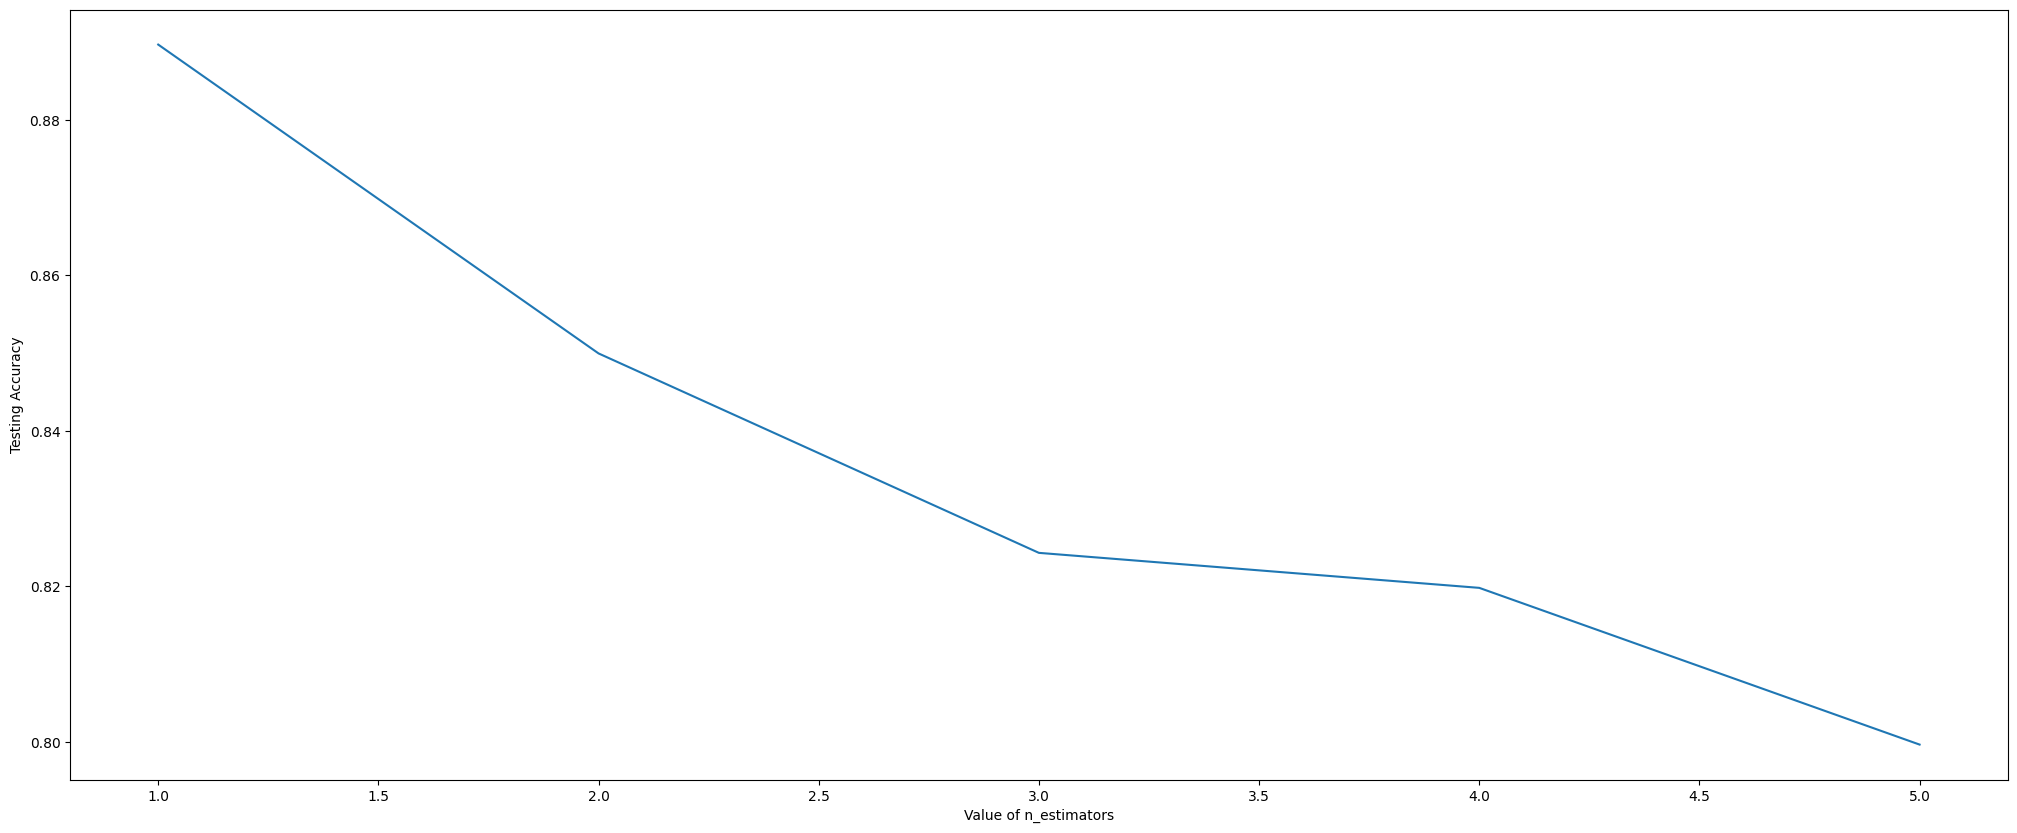

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
N=5
k_range = range (1,N+1)
scores={}
scores_list = []
for k in tqdm(k_range):
  xgb_classifier = xgb.XGBClassifier(max_depth=k,random_state=0)
  xgb_classifier.fit(X_train.values, y_train.values)
  y_pred=xgb_classifier.predict(X_test.values)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))


%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best depth:")
best_depth=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_depth)

In [ ]:

import xgboost as xgb
xgb_depth = xgb.XGBClassifier(max_depth=best_depth,random_state=0)
xgb_depth.fit(X_train.values,y_train.values)
y_pred = xgb_depth.predict(X_test.values)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(xgb_depth,4,'xgboost')]=accuracy_score(y_test, y_pred)
print(xgb_depth)

[[  1554    896   5109]
 [  2382  40560  10193]
 [   987     15 115814]]
              precision    recall  f1-score   support

           0       0.32      0.21      0.25      7559
           1       0.98      0.76      0.86     53135
           2       0.88      0.99      0.93    116816

    accuracy                           0.89    177510
   macro avg       0.73      0.65      0.68    177510
weighted avg       0.89      0.89      0.88    177510

Accurecy:  0.8896850881640471
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=Non

In [ ]:
import xgboost as xgb
xgb_estimator = xgb.XGBClassifier(n_estimators=best_estimator,random_state=0)
xgb_estimator.fit(X_train.values,y_train.values)
y_pred = xgb_estimator.predict(X_test.values)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(xgb_estimator,4,'xgboost')]=accuracy_score(y_test, y_pred)
print(xgb_estimator)

[[  1560    973   5026]
 [  3695  39077  10363]
 [  1642     35 115139]]
              precision    recall  f1-score   support

           0       0.23      0.21      0.22      7559
           1       0.97      0.74      0.84     53135
           2       0.88      0.99      0.93    116816

    accuracy                           0.88    177510
   macro avg       0.69      0.64      0.66    177510
weighted avg       0.88      0.88      0.87    177510

Accurecy:  0.8775618275026759
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=Non

In [ ]:
import xgboost as xgb
xgb_all = xgb.XGBClassifier(n_estimators=best_estimator,max_depth=best_depth,random_state=0)
xgb_all.fit(X_train.values,y_train.values)
y_pred = xgb_all.predict(X_test.values)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(xgb_all,4,'xgboost')]=accuracy_score(y_test, y_pred)

[[     0      0   7559]
 [     0      8  53127]
 [     0      0 116816]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      7559
           1       1.00      0.00      0.00     53135
           2       0.66      1.00      0.79    116816

    accuracy                           0.66    177510
   macro avg       0.55      0.33      0.26    177510
weighted avg       0.73      0.66      0.52    177510

Accurecy:  0.6581263027435074


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#Histogram-Based Gradient Boosting

In [ ]:

from sklearn.ensemble import HistGradientBoostingClassifier

hisgradBoost_default = HistGradientBoostingClassifier(random_state=0)
hisgradBoost_default.fit(X_train, y_train)
y_pred = hisgradBoost_default.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(hisgradBoost_default,5,'HistGradientBoostingClassifier')]=accuracy_score(y_test, y_pred)

[[  4197    322   3040]
 [  6193  20265  26677]
 [  1129    144 115543]]
              precision    recall  f1-score   support

           0       0.36      0.56      0.44      7559
           1       0.98      0.38      0.55     53135
           2       0.80      0.99      0.88    116816

    accuracy                           0.79    177510
   macro avg       0.71      0.64      0.62    177510
weighted avg       0.83      0.79      0.76    177510

Accurecy:  0.7887161286688074


  0%|          | 0/6 [00:00<?, ?it/s]

5/10 round completed......................... Accurecy: 0.7901583009407921
6/10 round completed......................... Accurecy: 0.7985521942425778
7/10 round completed......................... Accurecy: 0.80211255703904
8/10 round completed......................... Accurecy: 0.7911779618049687
9/10 round completed......................... Accurecy: 0.7929525097177624
10/10 round completed......................... Accurecy: 0.7939890710382513
The best max_iter:
7


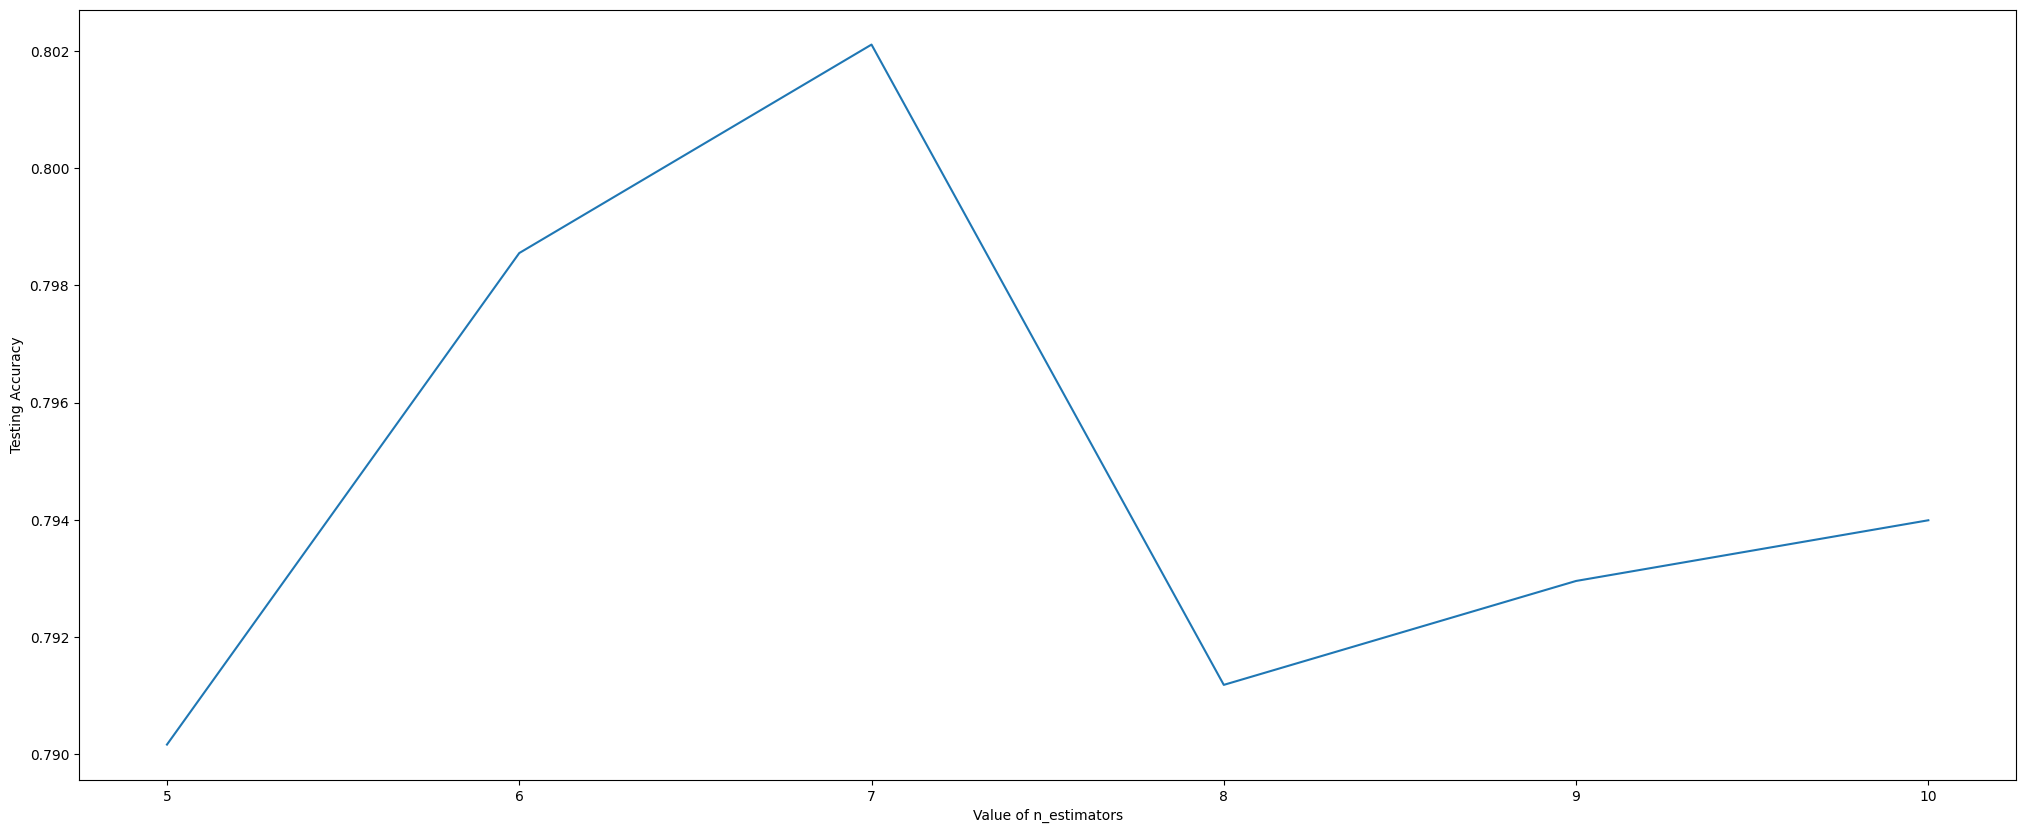

In [ ]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score
N=10
k_range = range (5,N+1)
scores={}
scores_list = []
for k in tqdm(k_range):
  hisgradBoost_cls = HistGradientBoostingClassifier(max_iter=k,random_state=0)
  hisgradBoost_cls.fit(X_train, y_train)
  y_pred=hisgradBoost_cls.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))


%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best max_iter:")
best_estimator=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)

  0%|          | 0/5 [00:00<?, ?it/s]

1/5 round completed......................... Accurecy: 0.9009238916117401
2/5 round completed......................... Accurecy: 0.8483522055095487
3/5 round completed......................... Accurecy: 0.8428370232662948
4/5 round completed......................... Accurecy: 0.8131203875837981
5/5 round completed......................... Accurecy: 0.7952228043490508
The best max_depth:
1


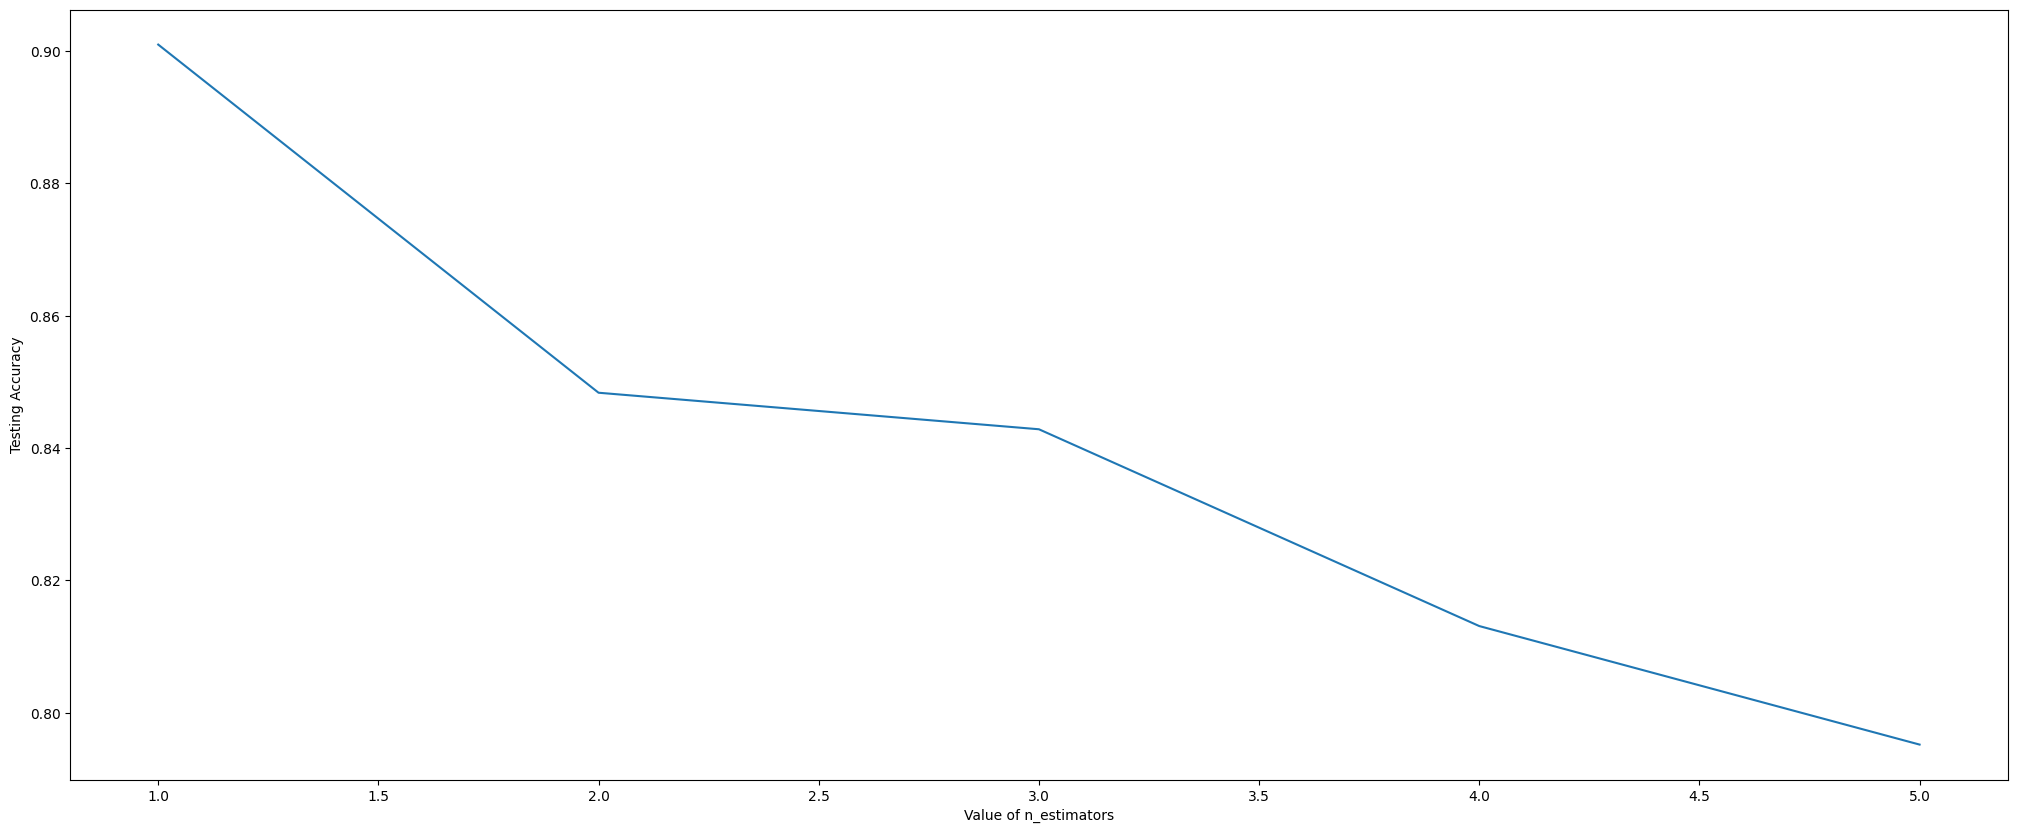

In [ ]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score
N=5
k_range = range (1,N+1)
scores={}
scores_list = []
for k in tqdm(k_range):
  hisgradBoost_cls = HistGradientBoostingClassifier(max_depth=k,random_state=0)
  hisgradBoost_cls.fit(X_train, y_train)
  y_pred=hisgradBoost_cls.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))


%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best max_depth:")
max_depth=list(scores.keys())[scores_list.index(max(scores_list))]
print(max_depth)

In [ ]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score

hisgradBoost_max_iter = HistGradientBoostingClassifier(max_iter=best_estimator,random_state=0)
hisgradBoost_max_iter.fit(X_train, y_train)
y_pred = hisgradBoost_max_iter.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(hisgradBoost_max_iter,5,'HistGradientBoostingClassifier')]=accuracy_score(y_test, y_pred)

[[  1317    488   5754]
 [  4501  26141  22493]
 [  1876     15 114925]]
              precision    recall  f1-score   support

           0       0.17      0.17      0.17      7559
           1       0.98      0.49      0.66     53135
           2       0.80      0.98      0.88    116816

    accuracy                           0.80    177510
   macro avg       0.65      0.55      0.57    177510
weighted avg       0.83      0.80      0.79    177510

Accurecy:  0.80211255703904


In [ ]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score

hisgradBoost_max_depth = HistGradientBoostingClassifier(max_depth=max_depth,random_state=0)
hisgradBoost_max_depth.fit(X_train, y_train)
y_pred = hisgradBoost_max_depth.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(hisgradBoost_max_depth,5,'HistGradientBoostingClassifier')]=accuracy_score(y_test, y_pred)

[[  1177    899   5483]
 [  1560  42812   8763]
 [   865     17 115934]]
              precision    recall  f1-score   support

           0       0.33      0.16      0.21      7559
           1       0.98      0.81      0.88     53135
           2       0.89      0.99      0.94    116816

    accuracy                           0.90    177510
   macro avg       0.73      0.65      0.68    177510
weighted avg       0.89      0.90      0.89    177510

Accurecy:  0.9009238916117401


In [ ]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score

hisgradBoost_all = HistGradientBoostingClassifier(max_iter=best_estimator,max_depth=max_depth,random_state=0)
hisgradBoost_all.fit(X_train, y_train)
y_pred = hisgradBoost_all.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(hisgradBoost_all,5,'HistGradientBoostingClassifier')]=accuracy_score(y_test, y_pred)

[[     0      0   7559]
 [     0      6  53129]
 [     0      0 116816]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      7559
           1       1.00      0.00      0.00     53135
           2       0.66      1.00      0.79    116816

    accuracy                           0.66    177510
   macro avg       0.55      0.33      0.26    177510
weighted avg       0.73      0.66      0.52    177510

Accurecy:  0.6581150357726325


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#Result

In [ ]:
models=[]

for i in result:
  models.append(i[0])
  print(i[0],i[1]," : ",result[i])
  print("---------------------------------------------------------------")
  print()

AdaBoostClassifier() 1  :  0.8468255309560024
---------------------------------------------------------------

AdaBoostClassifier(n_estimators=4, random_state=0) 1  :  0.912376767506056
---------------------------------------------------------------

GradientBoostingClassifier(random_state=0) 2  :  0.8395865021688919
---------------------------------------------------------------

GradientBoostingClassifier(n_estimators=59, random_state=0) 2  :  0.8544025688693595
---------------------------------------------------------------

GradientBoostingClassifier(max_depth=1, random_state=0) 2  :  0.8913018984845924
---------------------------------------------------------------

GradientBoostingClassifier(max_depth=1, n_estimators=59, random_state=0) 2  :  0.7950425328150527
---------------------------------------------------------------

RandomForestClassifier(random_state=0) 3  :  0.7232099600022533
---------------------------------------------------------------

RandomForestClassifier(n_est

#Choose a model for XAI

In [ ]:
# model = ada_defult
# model = ada_best_estimator

model = gradBoost_default
# model = gradBoost_estimator
# model = gradBoost_depth
# model = gradBoost_all

#model = rf_default
# model = rf_estimator
# model = rf_depth
# model = rf_all

#model = xgb_deafult
# model = xgb_depth
# model = xgb_estimator
# model = xgb_all



#model = hisgradBoost_default
# model = hisgradBoost_max_iter
# model = hisgradBoost_max_depth
# model = hisgradBoost_all

#Cross Validation

In [ ]:
"""from sklearn.model_selection import cross_val_score

k=5
for i in result:
  print(i[0]," -> Accuracy: ",result[i])
  l=list(cross_val_score(i[0],X_new, y_new,cv=k))
  avg=sum(l)/k
  print(i[0]," -> AVG Accurecy After CV: "+str(avg)+ " (For "+str(k)+" Fold)")
  print("--------------------------------------------------------------------------")"""

'from sklearn.model_selection import cross_val_score\n\nk=5\nfor i in result:\n  print(i[0]," -> Accuracy: ",result[i])\n  l=list(cross_val_score(i[0],X_new, y_new,cv=k))\n  avg=sum(l)/k\n  print(i[0]," -> AVG Accurecy After CV: "+str(avg)+ " (For "+str(k)+" Fold)")\n  print("--------------------------------------------------------------------------")'

#SHAP

In [ ]:
!pip install shap
import shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 9.9 MB/s eta 0:00:00


In [ ]:
def SHAP_EXP(model,graph_feat,list_of_feat1,start_index,end_index):
  print("Models: ",model)

  explainer = shap.Explainer(model.predict, X_test)

  shap_values1 = explainer(X_test[start_index:end_index])
  features_names=list_of_feat1


  print("Global Explaination")
  shap.plots.bar(shap_values1,max_display=graph_feat["max_display"])

  print("Global Explaination")

  shap.summary_plot(shap_values1,max_display=graph_feat["max_display"])

  print("---------------------")

  print("Local Explaination")
  shap.plots.waterfall(shap_values1[graph_feat["shap_values Index"]],max_display=graph_feat["max_display"])


  print("Local Explaination")

  shap.plots.bar(shap_values1[graph_feat["shap_values Index"]],max_display=graph_feat["max_display"])


Models:  XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)


Exact explainer: 101it [00:35,  2.05it/s]


Global Explaination


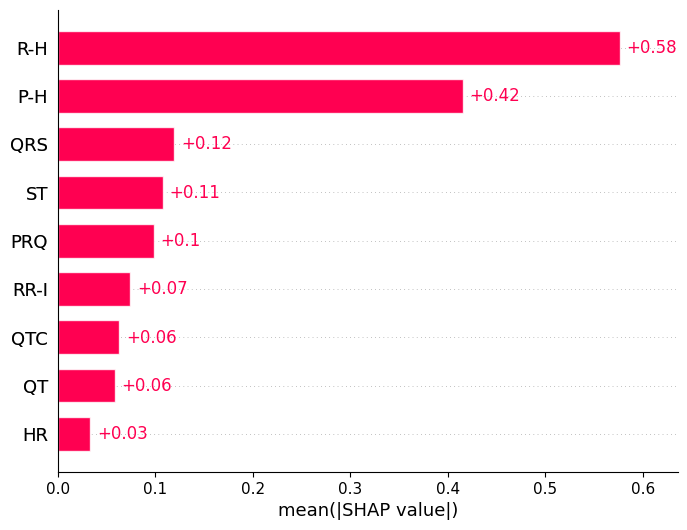

Global Explaination


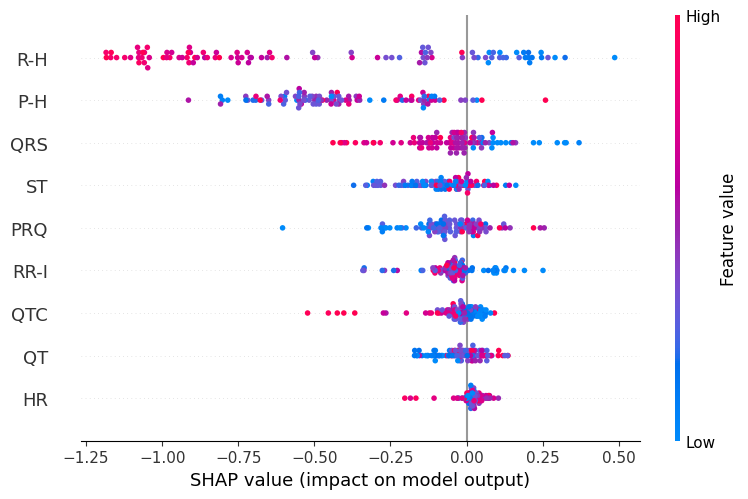

---------------------
Local Explaination


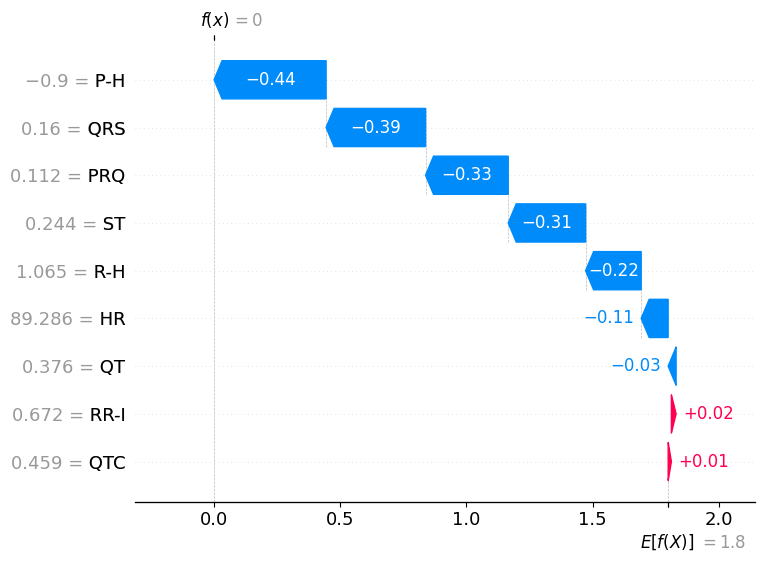

Local Explaination


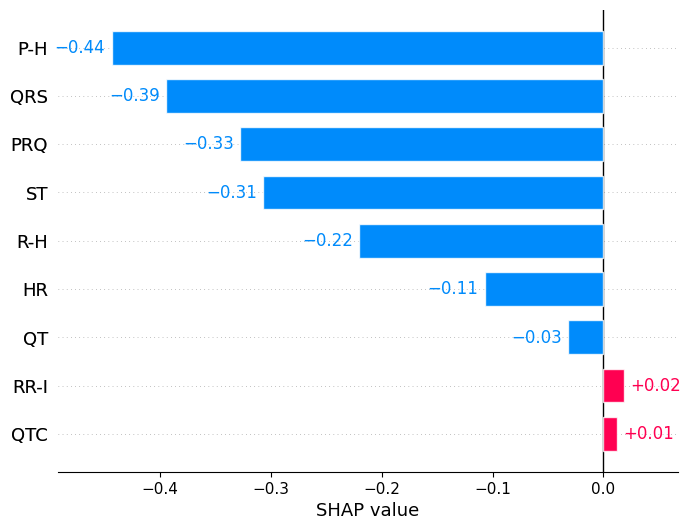

In [ ]:
graph_feat={
    "max_display":30,
    "shap_values Index":10
}
start_index,end_index=0,100

SHAP_EXP(model,graph_feat,list(X_test.columns),start_index,end_index)

#Lime

In [ ]:
!pip install lime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283839 sha256=ec4f4eea8d80bd0468e9ec10e198dacdb032dc54c493549f14cbd55778372b7f
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
import lime
from lime import lime_tabular

def LIME_EXP(model,row,num_features,top_labels):

    if str(model)[:3] == "XGB":

      explainer = lime.lime_tabular.LimeTabularExplainer(
        X_train.values,
        feature_names=list(list(X_train.columns)),
        class_names=['arrhythmic', 'healthy', 'ischemic'],
        mode='classification'
        )

      exp = explainer.explain_instance(X_test.iloc[row, :].values,
                                 model.predict_proba,
                                 num_features=num_features,
                                 top_labels=top_labels)




    else:
      explainer = lime_tabular.LimeTabularExplainer(
        training_data=np.array(X_train),
        feature_names=list(X_train.columns),
        class_names=['arrhythmic', 'healthy', 'ischemic'],
        mode='classification'
        )

      exp = explainer.explain_instance(X_test.iloc[row],
                                      model.predict_proba,
                                      num_features=num_features,
                                      top_labels=top_labels)



    exp.show_in_notebook(show_table=True, show_all=True)



    from IPython.display import HTML
    html_data = exp.as_html()
    HTML(data=html_data)

    exp.save_to_file(str(model)[0:10]+".html")

In [ ]:
row = int(input("Enter the index of row to explain: "))

num_features,top_labels = 6,4
LIME_EXP(model,row,num_features,top_labels)

Enter the index of row to explain: 10


X does not have valid feature names, but HistGradientBoostingClassifier was fitted with feature names
